<h1> <b>Prediksi Penyakit Diabetes<b> <h1>

# Import Library

Mengimport library yang akan digunakan

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

# Data Loading

Mengunduh data dari sumber https://www.kaggle.com/datasets/whenamancodes/predict-diabities/data dan diubah ke dalam bentuk dataframe

Kolom atau variabel yang ada pada dataset:

* Pregnancies   : menyatakan jumlah kehamilan
* Glucose       : menyatakan kadar Glukosa dalam darah
* BloodPressure : menyatakan pengukuran tekanan darah
* SkinThickness :	menyatakan ketebalan kulit
* Insulin       :	menyatakan kadar Insulin dalam darah
* BMI 	        : menyatakan indeks massa tubuh
* DiabetesPedigreeFunction : menyatakan persentase Diabetes
* Age                      : menyatakan usia
* Outcome : menyatakan hasil akhir 1 adalah Ya dan 0 adalah Tidak

In [2]:
# Menghubungkan Colab ke Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Output kode diatas memberikan informasi sebagai berikut:

*   Terdapat 768 baris dalam dataset
*   Ada 9 Kolom yaitu: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, dan Outcome.

# Explanatory Data Analysis

Melakukan beberapa tahapan sebagai berikut :

1.   Deskripsi Variabel
2.   Menangani missing value dan outliers
3.   Analisis Univariate

<h2> Deskripsi Variabel <h2>

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Dari output terlihat bahwa:

* Terdapat 2 kolom numerik dengan tipe data float64 yaitu: BMI dan DiabetesPedigreeFunction.
* Terdapat 7 kolom numerik dengan tipe data int64, yaitu: Pregnancies,Glucose, BloodPressure, SkinThickness, Insulin, Age , dan Outcome.

In [28]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<h2> Menangani missing value <h2>

Melakukan pengecekan terlebih dahulu apakah didalam dataset terdapat missing value dengan kode berikut :

In [29]:
# Mengecek apakah ada data duplikat
data.duplicated().sum()

0

In [30]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Berdasarkan output diatas dataset yang digunakan tidak memiliki missing value

<h2> Menangani Outliers <h2>

outliers adalah sampel yang nilainya sangat jauh dari cakupan umum data utama. Pada kasus ini, outliers akan dideteksi dengan teknik visualisasi data (boxplot). Kemudian, ouliers akan ditangani dengan teknik IQR method

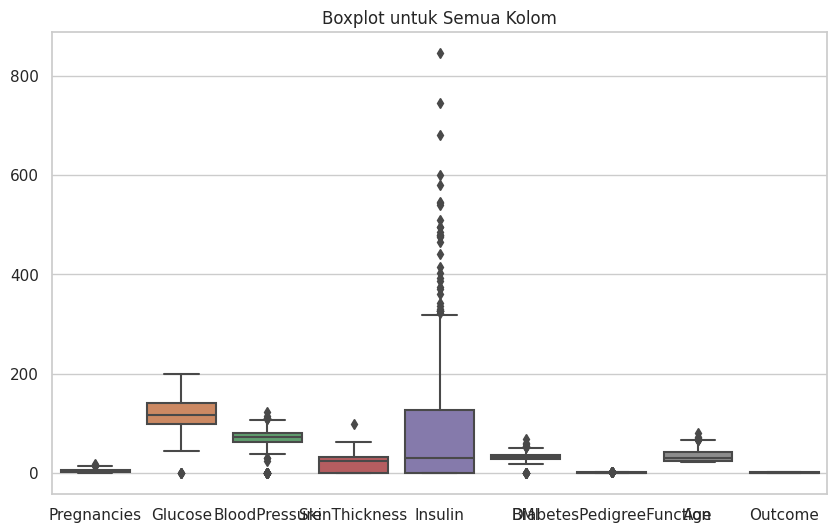

In [31]:
# Membuat boxplot untuk semua kolom
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Fungsi boxplot dari Seaborn
sns.boxplot(data=data)

# Menambahkan judul
plt.title('Boxplot untuk Semua Kolom')

# Menampilkan boxplot
plt.show()

In [32]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
data.shape

(639, 9)

<h2> EDA - Analisis Univariate <h2>

Analisis univariate merupakan proses untuk mengeksplorasi dan menjelaskan setiap variabel dalam kumpulan data secara terpisah.

<h4> Analisis fitur numerik <h4>

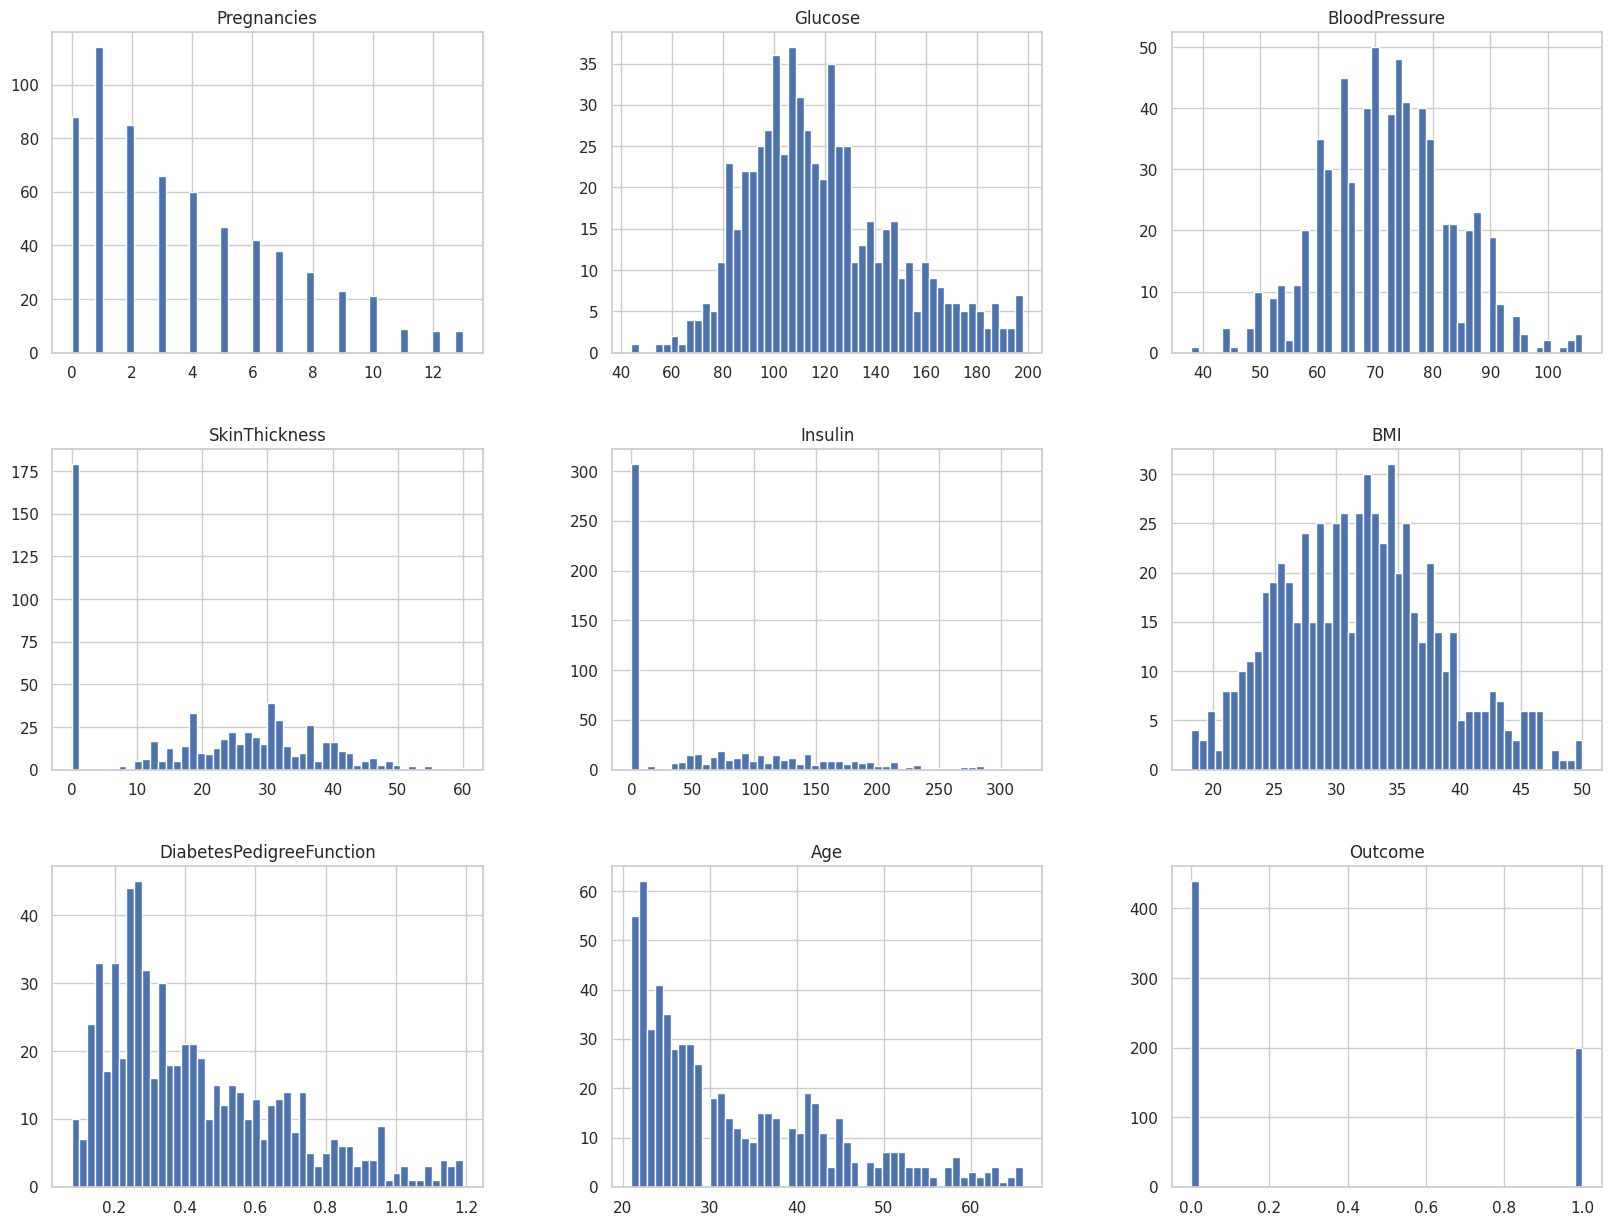

In [33]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [34]:
data.groupby('Outcome').size()

Outcome
0    439
1    200
dtype: int64

Berdasarkan output di atas, jumlah orang yang memiliki penyakit diabetes berjumlah 200, sedangkan yang tidak terkena sebanyak 439 orang.

#Data Preparation

<h4> Imbalance Dataset <h4>

Karena data outcome yang dimiliki tidak seimbang maka kita perlu menyeimbangkan datanya terllebih dahulu

In [35]:
X = data.drop(columns = 'Outcome')
y = data['Outcome']
print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [36]:
from imblearn.over_sampling import RandomOverSampler
sm = RandomOverSampler(random_state=42)
X_sampling, y_sampling = sm.fit_resample(X,y)

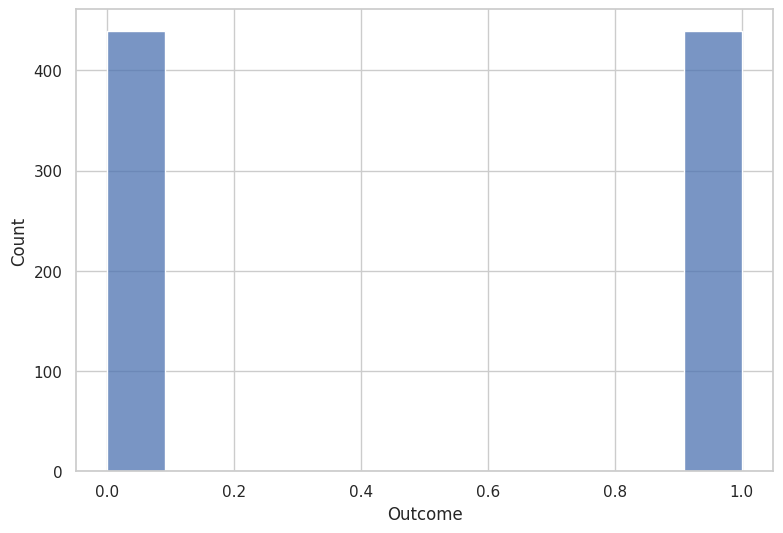

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(9,6))
sns.histplot(data=y_sampling)
plt.show()

Berdasarkan output diatas variabel outcome telah seimbang dengan jumlah masing-masing 439.

<h4> Train-Test Split <h4>

 Menggunakan proporsi pembagian sebesar 80:20 dengan fungsi train_test_split dari sklearn.

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sampling, y_sampling, test_size=0.2, random_state=42)

In [39]:
print(f'Total # of sample in whole dataset: {len(X_sampling)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 878
Total # of sample in train dataset: 702
Total # of sample in test dataset: 176


<h4> Standarisasi <h4>

Standarisasi menggunakan teknik StandarScaler dari library Scikitlearn,

StandardScaler melakukan proses standarisasi fitur dengan mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi.  StandardScaler menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0.

In [40]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

#Model Development

Model development adalah tahapan di mana kita menggunakan algoritma machine learning untuk menjawab problem statement dari tahap business understanding.

In [41]:
from sklearn import svm
from sklearn.metrics import accuracy_score

svm = svm.SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

#Evaluasi Model

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[78 13]
 [18 67]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        91
           1       0.84      0.79      0.81        85

    accuracy                           0.82       176
   macro avg       0.82      0.82      0.82       176
weighted avg       0.82      0.82      0.82       176



#Tuning Hyperparameter

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Definisikan model SVM dengan kernel radial
svm_rbf = svm.SVC(kernel='rbf')

# Set parameter yang akan di-tune
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.01, 0.1, 1, 10]}

# Buat objek GridSearchCV
grid_search = GridSearchCV(svm_rbf, param_grid, cv=5, scoring='accuracy')

# Lakukan penelusuran parameter pada data training
grid_search.fit(X_train, y_train)

# Cetak parameter terbaik yang ditemukan
best_params = grid_search.best_params_
print(f"Parameter Terbaik: {best_params}")

# Prediksi dengan model terbaik
y_pred = grid_search.predict(X_test)

# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.2f}")# Definisikan model SVM dengan kernel radial


Parameter Terbaik: {'C': 1, 'gamma': 10}
Akurasi Model: 0.93


In [44]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[91  0]
 [13 72]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        91
           1       1.00      0.85      0.92        85

    accuracy                           0.93       176
   macro avg       0.94      0.92      0.93       176
weighted avg       0.94      0.93      0.93       176

